In [9]:
from astropy.io import ascii
from astropy.table import Column
import numpy as np
from matplotlib import pyplot
import os

# Problem 2

## Part a

Read in data and add yerror Column

In [80]:
data_dir = '../data'
tbdata = ascii.read(os.path.join(data_dir, 'xy_fitting.txt'), names = ['x', 'y'])
y_err = np.ones(len(tbdata))*5
tbdata.add_column(Column(y_err, name = 'sigma'))

y(x) = a0+a1*x

can be written as

y(x) = a0*f1(x) + a1*f2(x)

where f1(x) = 1 and f2(x) = x

In [81]:
f = [1., tbdata['x']]

Define alpha

In [82]:
alpha = np.matrix(np.empty((2,2)))
alpha[0,0] = np.sum((1./tbdata['sigma']**2)*f[0]*f[0])
alpha[0,1] = np.sum((1./tbdata['sigma']**2)*f[0]*f[1])
alpha[1,0] = np.sum((1./tbdata['sigma']**2)*f[1]*f[0])
alpha[1,1] = np.sum((1./tbdata['sigma']**2)*f[1]*f[1])
print('alpha = \n', alpha)

alpha = 
 [[  2.00000000e+00   9.74975275e+01]
 [  9.74975275e+01   6.25141612e+03]]


Define beta

In [83]:
beta = np.matrix(np.empty((2, 1)))
beta[0] = np.sum((tbdata['y']*f[0])/(tbdata['sigma']**2))
beta[1] = np.sum((tbdata['y']*f[1])/(tbdata['sigma']**2))
print('beta = \n', beta)

beta = 
 [[ -19.07267259]
 [-374.15702405]]


## Part B

Invert alpha

In [84]:
alpha_inv = np.linalg.inv(alpha)

Calculate best fit parameters

In [85]:
a = alpha_inv*beta
print('a0 = ', a[0])
print('a1 = ', a[1])

a0 =  [[-27.61096136]]
a1 =  [[ 0.37077094]]


In [86]:
stdev_a0 = np.sqrt(alpha_inv[0,0])
stdev_a1 = np.sqrt(alpha_inv[1,1])
print('stdev a0 =', stdev_a0)
print('stdev a1 =', stdev_a1)

stdev a0 = 1.44424598843
stdev a1 = 0.0258325312691


## Part c

<IPython.core.display.Javascript object>


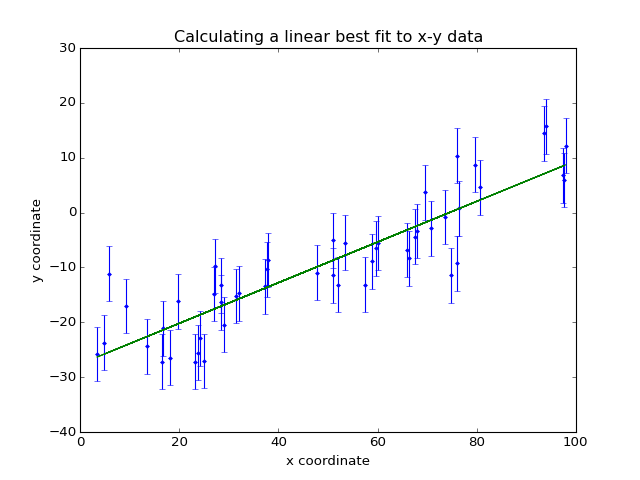

In [90]:
%matplotlib notebook
ymod = np.array(a[0] + a[1]*tbdata['x']).flatten()
pyplot.errorbar(tbdata['x'], tbdata['y'], yerr = tbdata['sigma'], marker = '.', ls = 'none')
pyplot.plot(tbdata['x'], ymod )
pyplot.xlabel('x coordinate')
pyplot.ylabel('y coordinate')
pyplot.title('Calculating a linear best fit to x-y data')

## Part D

In [88]:
chi_sq = np.sum(((tbdata['y'] - ymod)/(tbdata['sigma']))**2)
print('chi square = ', chi_sq)

chi square =  55.7842090928


In [91]:
#DOF = num pts - num params - my notes say this but online says num pts - num params - 1
reduced_chi = chi_sq/(len(tbdata) - 2.)
print('reduced chi square', reduced_chi)

reduced chi square 1.16217102277


The reduced chi square close to 1 so its a good fit